In [48]:
# Import
import pandas as pd
import darts
from darts import TimeSeries
from darts.models import ExponentialSmoothing, ARIMA, Prophet
import matplotlib.pyplot as plt
from darts.utils.utils import SeasonalityMode
from darts.utils.statistics import plot_acf, plot_pacf, check_seasonality, extract_trend_and_seasonality, ModelMode, remove_trend, remove_from_series, stationarity_tests
import glob 
import os
from darts.utils.missing_values import fill_missing_values
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
import sys, os
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import STL
from prophet import Prophet as prophet_model_lib

import seaborn as sns
from statsmodels.tsa.stattools import adfuller


In [49]:
# Merging all files and making the dataframe
# df = pd.concat(map(pd.read_csv, glob.glob(os.path.join("./data" , "*.csv"))), ignore_index= True)
df = pd.read_csv('data/0.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('timestamp')
df = df.asfreq(freq='T')

In [50]:
df_hourly = df.resample('H').mean().interpolate()

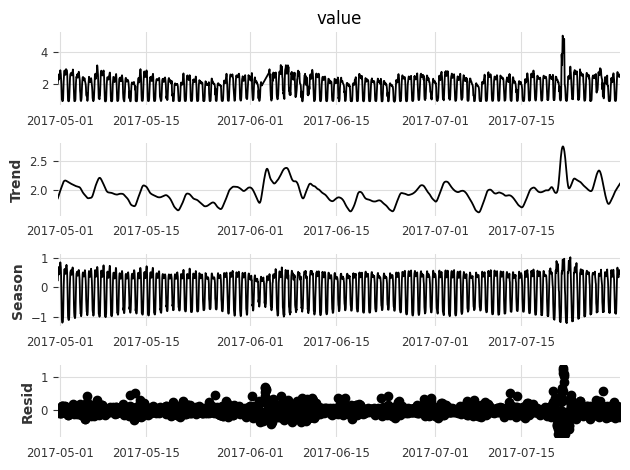

In [51]:
decompose = STL(df_hourly['value']).fit()
decompose.plot()
plt.show()

#### Plotting the timeserie

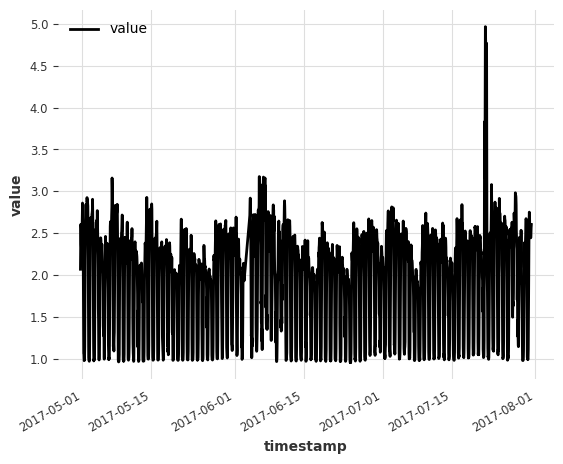

In [52]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df_hourly, value_cols='value')

# Plot the time series
# plt.rcParams["figure.figsize"] = (20,10)
series.plot()
plt.ylabel("value")
plt.show()

In [53]:
# Check occurence of seasonality and find the period of it
is_sesonal, seasonality_period = check_seasonality(ts = series, m = None, max_lag = 100, alpha = 0.05)
print("Seasonal:", is_sesonal, "Period:", seasonality_period)

Seasonal: True Period: 24


In [54]:
# Extract trend & seasonality
# trend, seasonality = extract_trend_and_seasonality(ts = series, model = ModelMode.ADDITIVE, method = "STL", freq = seasonality_period)
# series_minus_trend = remove_from_series(ts = series, other = trend, model = ModelMode.ADDITIVE)
# series_minus_trend.plot(label = "Trend Extracted series")
# series_minus_trend_and_sesonality = remove_from_series(ts = series_minus_trend, other = seasonality, model = ModelMode.ADDITIVE )
# series_minus_trend_and_sesonality.plot(label = "Trend and Seasonality Extracted series", color = "red")

In [55]:
# Checking being stationary or non stationary
is_Stationary = stationarity_tests(ts = series, p_value_threshold_adfuller = 0.05, p_value_threshold_kpss = 0.05)
if is_Stationary == False:
    # Parameters can be changed to fit better
    series = series.diff()
else:
    print("stationary already")

stationary already


f:\datadays\github\env\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [56]:
# Set aside the last 20 percent of ts as a validation series
train, val = series[:-round(len(df_hourly) / 5)], series[-round(len(df_hourly) / 5):]

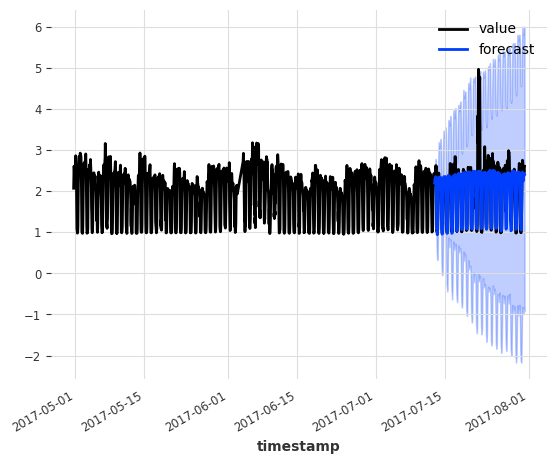

In [57]:
exp_model = ExponentialSmoothing(seasonal_periods=seasonality_period)
exp_model.fit(train)
exp_prediction = exp_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
exp_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

f:\datadays\github\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\datadays\github\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
f:\datadays\github\env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


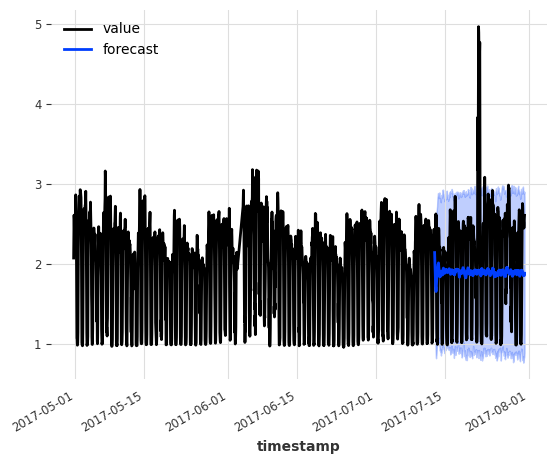

In [58]:
arima_model = ARIMA(9, 1, 5)
arima_model.fit(train)
arima_prediction = arima_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
arima_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

2022-09-07 20:44:18 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-09-07 20:44:20 cmdstanpy DEBUG: TBB already found in load path
2022-09-07 20:44:21 prophet INFO: Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2022-09-07 20:44:22 cmdstanpy DEBUG: input tempfile: C:\Users\Pouria.N\AppData\Local\Temp\tmp_zag3mgw\bes9rob2.json
2022-09-07 20:44:22 cmdstanpy DEBUG: input tempfile: C:\Users\Pouria.N\AppData\Local\Temp\tmp_zag3mgw\5vp8l8k_.json
2022-09-07 20:44:22 cmdstanpy DEBUG: idx 0
2022-09-07 20:44:22 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-09-07 20:44:22 cmdstanpy DEBUG: CmdStan args: ['F:\\datadays\\github\\env\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=34710', 'data', 'file=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmp_zag3mgw\\bes9rob2.json', 'init=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmp_zag3mgw\\5vp8l8k_.json', 'output', 'file=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmp0

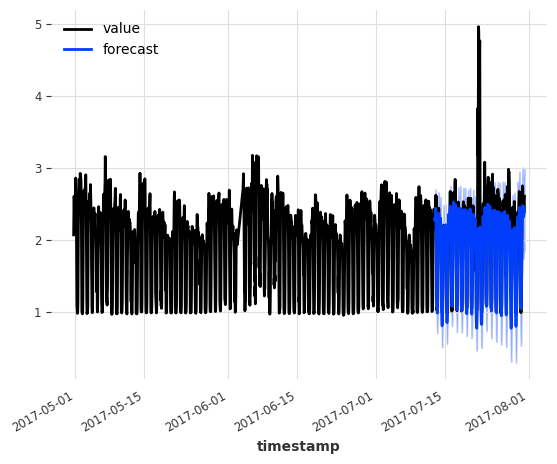

In [59]:
prophet_model = Prophet()
prophet_model.fit(train)
prophet_prediction = prophet_model.predict(len(val), num_samples=1000)
# Plotting the predictions
series.plot()
prophet_prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

2022-09-07 20:48:51 cmdstanpy DEBUG: cmd: where.exe tbb.dll
cwd: None
2022-09-07 20:48:51 cmdstanpy DEBUG: TBB already found in load path
2022-09-07 20:48:52 cmdstanpy DEBUG: input tempfile: C:\Users\Pouria.N\AppData\Local\Temp\tmp_zag3mgw\gfpd02ic.json
2022-09-07 20:48:52 cmdstanpy DEBUG: input tempfile: C:\Users\Pouria.N\AppData\Local\Temp\tmp_zag3mgw\8pp7wocm.json
2022-09-07 20:48:52 cmdstanpy DEBUG: idx 0
2022-09-07 20:48:52 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-09-07 20:48:52 cmdstanpy DEBUG: CmdStan args: ['F:\\datadays\\github\\env\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=10756', 'data', 'file=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmp_zag3mgw\\gfpd02ic.json', 'init=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmp_zag3mgw\\8pp7wocm.json', 'output', 'file=C:\\Users\\Pouria.N\\AppData\\Local\\Temp\\tmpscyhktbd\\prophet_model-20220907204852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:48:52 - cmdstanpy - INFO

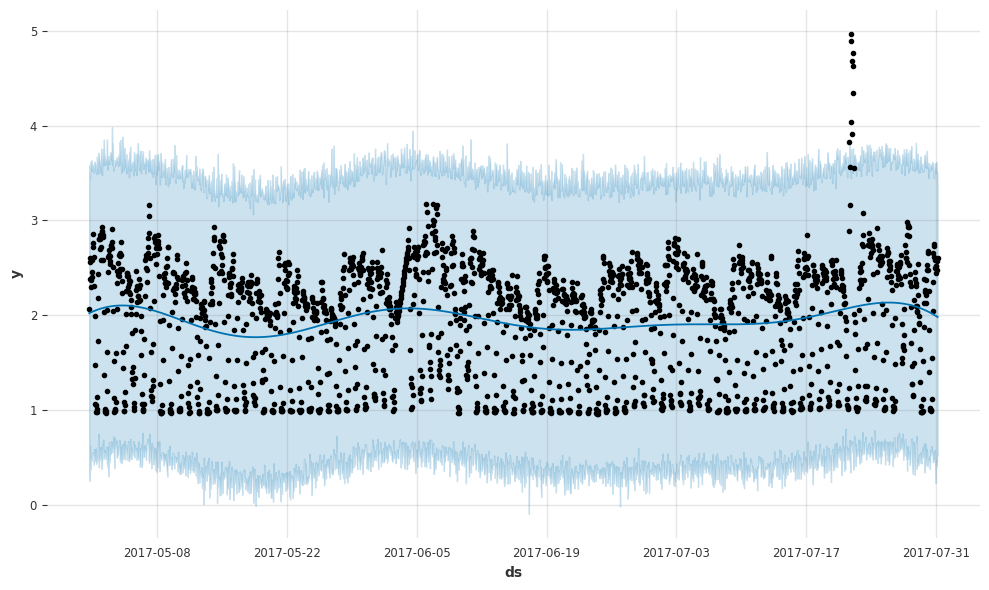

In [67]:
train_df = TimeSeries.pd_dataframe(series).reset_index()
train_df.columns = ["ds","y"]

# model preparation
prophet_model = prophet_model_lib(daily_seasonality = False, yearly_seasonality = True, weekly_seasonality = False,
seasonality_mode = 'additive', interval_width = 0.99, changepoint_range = 0.8)
prophet_model = prophet_model.fit(train_df)

# forecast
forecast = prophet_model.predict(train_df)
prophet_model.plot(forecast)
plt.show()

In [68]:
# metrics of prediction
performance = pd.merge(train_df, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

performance_MAE = mean_absolute_error(performance['y'], performance['yhat'])
print(f'The MAE {performance_MAE}')
performance_MAPE = mean_absolute_percentage_error(performance['y'], performance['yhat'])
print(f'MAPE {performance_MAPE}')

The MAE for the model is 0.513499674922937
The MAPE for the model is 0.33365087586140013


In [69]:
# anomalies datas
anomalies = performance[performance['anomaly']==1].sort_values(by='ds')
anomalies

KeyError: 'anomaly'

In [ ]:
# Visualize the anomalies
sns.scatterplot(x='ds', y='y', data=performance, hue='anomaly')
sns.lineplot(x='ds', y='yhat', data=performance, color='black')

#### Metrics - Measure models' performaces

#### Root mean squared error 